In [5]:
import pandas as pd

data = pd.read_csv("/Users/pavelpavlov/Desktop/Универ/ИИИ ЦК/aie-2025-2026/homeworks/HW02/S02-hw-dataset.csv")
data.head() #Первые строки датасеты
data.info() #Информация о стобцах
data.describe() #Базовая описательная статистика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [12]:
print(data.isna().mean()) #Подсчёт и вывод доли пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [13]:
data.duplicated() #Проверка на наличие полностью диблирующих строк

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [ ]:
problems = {}

# 1. Подозрительный возраст
problems["bad_age"] = data[
    (data["age"] < 0) |
    (data["age"] > 100) |
    (data["age"].isna())
]

# 2. Подозрительное количество покупок
problems["bad_purchases"] = data[
    (data["purchases"] < 0) |
    (data["purchases"] != data["purchases"].astype(int)) |  # нецелые
    ((data["purchases"] > 0) & (data["revenue"] == 0))       # есть покупки → доход не должен быть 0
]

# 3. Подозрительный доход
problems["bad_revenue"] = data[
    (data["revenue"] < 0) |
    ((data["revenue"] > 0) & (data["purchases"] == 0))       # есть доход → покупки не должны быть 0
]

# 4. Дубликаты user_id
problems["duplicate_user_id"] = data[data["user_id"].duplicated(keep=False)]

# Вывод
for key, value in problems.items():
    print(f"\n=== {key} ===")
    print(value)

# Вывод о качестве данных:
# Есть 3 строки с некорректны возрастом (age), 2 с некоторректной суммой заказа (purchases)
# 2 строки полностью диблируются (user_id), но нет строк с некорректной выручкой (revenue)



=== bad_age ===
    user_id    age country  purchases  revenue
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
12       13    NaN      US          9      630

=== bad_purchases ===
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0

=== bad_revenue ===
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

=== duplicate_user_id ===
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


In [ ]:
data["purchases"].value_counts() #Подсчёт частоты для количества покупок

purchases
 7     8
 6     8
 3     5
 5     4
 4     4
 0     3
 2     3
 9     2
-1     1
 8     1
 11    1
 1     1
Name: count, dtype: int64

In [ ]:
bins = [0, 18, 30, 45, 60, 120] #коридор значений
labels = ["0–18", "19–30", "31–45", "46–60", "60+"] #Группы по возрасту

data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels, right=False) #Группируем по возрасту
data["age_group"]

0     19–30
1     19–30
2     46–60
3     31–45
4       NaN
5       NaN
6     46–60
7     19–30
8     31–45
9     19–30
10    19–30
11    19–30
12      NaN
13    31–45
14    46–60
15    19–30
16    31–45
17    19–30
18    46–60
19    31–45
20     0–18
21    31–45
22    31–45
23    31–45
24    19–30
25    31–45
26    46–60
27    31–45
28    46–60
29    46–60
30    46–60
31    19–30
32    19–30
33    19–30
34    46–60
35    46–60
36    19–30
37    31–45
38    31–45
39    31–45
40    19–30
Name: age_group, dtype: category
Categories (5, object): ['0–18' < '19–30' < '31–45' < '46–60' < '60+']

In [ ]:
data["age_group"].value_counts() #Подсчёт строк каждой возрастной группы

age_group
19–30    14
31–45    13
46–60    10
0–18      1
60+       0
Name: count, dtype: int64

In [ ]:
grouped = data.groupby("age_group").agg({
    "age": "mean",
    "purchases": "mean",
    "revenue": ["sum", "mean"]
}) #группируем возрастные группы чтобы подсчитать средний возраст в группе,
# среднее количество покупок, суммарный и средний доходы

print(grouped)

                 age purchases revenue             
                mean      mean     sum         mean
age_group                                          
0–18        5.000000  8.000000    1488  1488.000000
19–30      23.642857  4.428571    8456   604.000000
31–45      35.538462  5.615385   15111  1162.384615
46–60      50.600000  4.100000    5856   585.600000
60+              NaN       NaN       0          NaN


/var/folders/1l/vcy811v12lb7mqthcxm0h1qh0000gn/T/ipykernel_73852/3508239035.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby("age_group").agg({


In [ ]:
# Вывод по базовому EDA:
# Доминируют группы возраста 19-30 (лет) и 31-45 (лет)
# Группы по средним значениям отличаются сильно
# Неожиданный эффект - нет записей с возрастом 60 и более лет, группа пустая

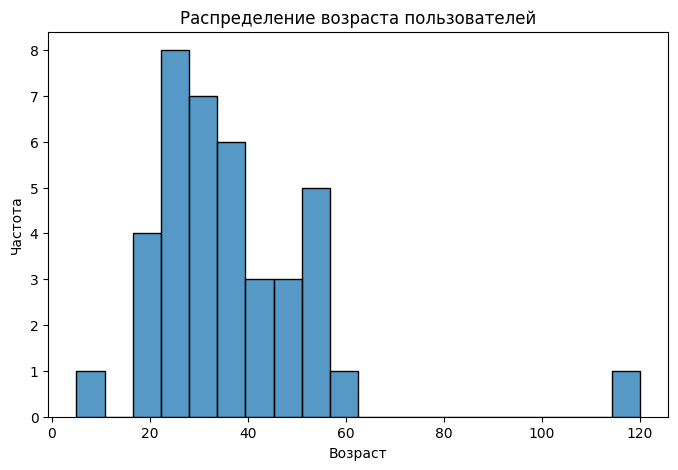

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма для количественного признака - age
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins=20, kde=False) #Создание гистограммы

plt.title("Распределение возраста пользователей") #Название гистограммы
plt.xlabel("Возраст") # Подпись оси x
plt.ylabel("Частота") #Подпись оси y

# Сохранение гистограммы
plt.savefig("/Users/pavelpavlov/Desktop/Универ/ИИИ ЦК/aie-2025-2026/homeworks/HW02/figures/age_histogram.png", dpi=300, bbox_inches="tight")


plt.show() #Показ гистограммы
#Вывод: Самое большое количество записей приходится на группу 19-39 лет, есть одна некорректная запись с age=120


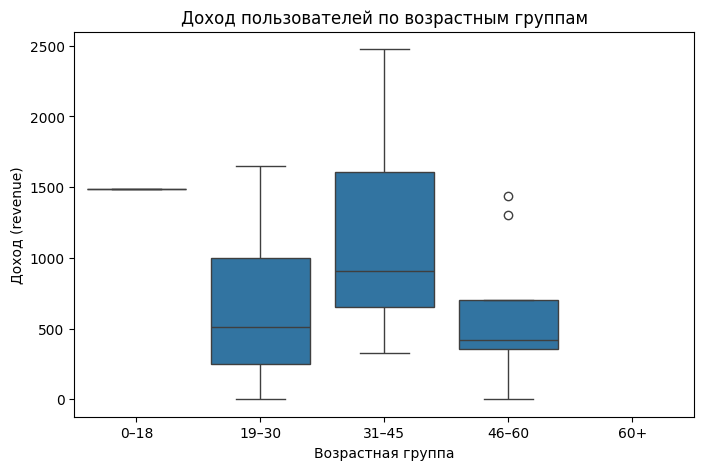

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="age_group", y="revenue", data=data) # Создание боксплота

plt.title("Доход пользователей по возрастным группам") # Название боксплота
plt.xlabel("Возрастная группа") # Подпись оси x
plt.ylabel("Доход (revenue)") # Подпись оси y
plt.show() # Показ боксплота
#Вывод: у группы 31-45 лет самый большой доход, у 46-60 самый низкий, для 60+ данных недостаточно

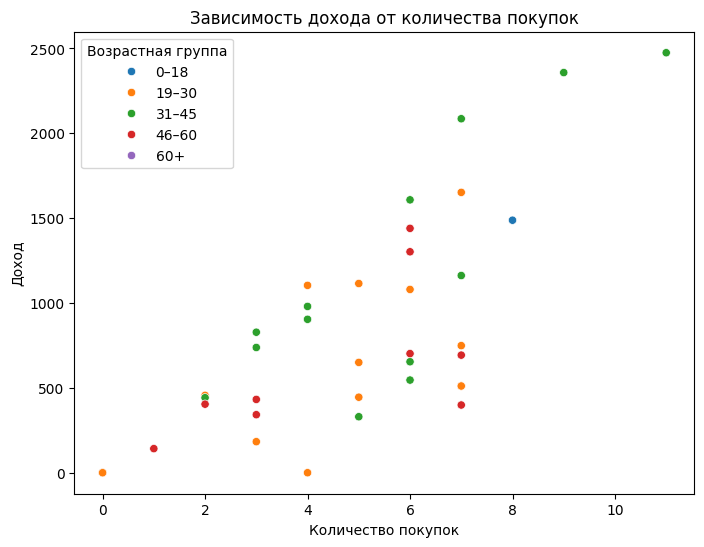

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="purchases", y="revenue", data=data, hue=data["age_group"]) #Создание диаграммы рассеивания для признаков purchase и revenue

plt.title("Зависимость дохода от количества покупок")
plt.xlabel("Количество покупок")
plt.ylabel("Доход")
plt.legend(title="Возрастная группа")
plt.show()
# Вывод: все возрастные группы совершают близкое количество покупок, однако группа 31-45 лет имеет наибольший доход